In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split, cross_validate

### Load in the Labelled Dataset

In [2]:
dfR = pd.read_csv(r'dfRLabelled.csv')
dfR.head(3)

,Unnamed: 0.1,Unnamed: 0,Product,Reviewer Name,Rating,Text,Date,Country,ASIN,Language,Rules,Label
0,0,0,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",Will of Burr,1.0 out of 5 stars,"I am a real fan of headphones, probably becaus...",11/17/2022,United States 🇺🇸,B09LCVHCVX,en,"3, 4, 5, 7 :",Suspicious
1,1,1,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",Allen Pak,5.0 out of 5 stars,To be honest. I wasn't expecting much when I ...,10/25/2022,United States 🇺🇸,B09LCVHCVX,en,NaN,Not Suspicious
2,2,2,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",brenda,5.0 out of 5 stars,1st off they connected very easily which is al...,11/29/2022,United States 🇺🇸,B09LCVHCVX,en,"3, 4, 6 :",Suspicious


In [3]:
dfR.shape

(2055, 12)

### Remove Reviews with No Text

In [4]:
dfR = dfR[dfR['Text'].notna()]
dfR.shape

(2011, 12)

### Determine Baseline Accuracy

In [5]:
dfR.Label.value_counts()

Label
Not Suspicious    1525
Suspicious         486
Name: count, dtype: int64

In [6]:
acc_baseline = 1525/(1525+486)
acc_baseline

0.7583291894579811

### tf-idf

In [7]:
# construct tf-idf vectors
Vectorizer = TfidfVectorizer(analyzer='word',stop_words='english', ngram_range=(1,1))
tfidf      = Vectorizer.fit_transform(dfR.Text)
vocabulary = Vectorizer.get_feature_names_out()

In [8]:
tfidf.shape

(2011, 3192)

In [9]:
word_counts = pd.DataFrame.sparse.from_spmatrix(tfidf,columns=vocabulary)
print(word_counts.shape)
word_counts.head()

(2011, 3192)


,00,10,100,10x,11,12,120,13,14,14k,...,yobolaa,yobolat9,young,younger,youtube,yrs,zaa,zero,zone,zoom
0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.15397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.240528,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# count words
print('top ten words:')
word_counts.sum().sort_values(ascending=False).head(10)

top ten words:


good       134.184483
great      121.302290
quality    112.863007
sound      105.313705
price       87.006550
earbuds     59.501822
battery     59.283895
use         54.495939
product     54.351308
ear         54.280666
dtype: float64

In [11]:
len(vocabulary)

3192

### Train-Test Split

In [12]:
# In the first step we will split the data in training and remaining dataset
X = tfidf
y = dfR.Label
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, stratify = y)

### Naive Bayes

In [13]:
Xtr = X_train
ytr = y_train

In [14]:
grid = {'alpha': np.linspace(0,10,11)}
nbayes = MultinomialNB()
nbayesCV = GridSearchCV(nbayes, param_grid=grid, return_train_score=True, n_jobs=-1)
nbayesCV.fit(Xtr,ytr)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             return_train_score=True)

<Axes: xlabel='alpha'>

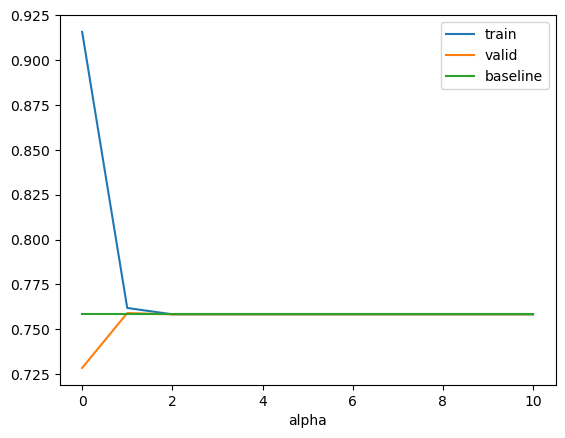

In [15]:
results = pd.DataFrame()
results['alpha'] = grid['alpha']
results['train'] = nbayesCV.cv_results_['mean_train_score']
results['valid'] = nbayesCV.cv_results_['mean_test_score']
results['baseline'] = acc_baseline
results.plot.line(x='alpha',y=['train','valid','baseline'])

In [16]:
nbayesCV.best_params_

{'alpha': 1.0}

In [17]:
acc_nbayes = nbayesCV.best_score_
print('Naive Bayes validation accuracy rate:',acc_nbayes.round(3))

Naive Bayes validation accuracy rate: 0.759


In [18]:
print('Baseline accuracy rate:',round(acc_baseline,3))

Baseline accuracy rate: 0.758


In [19]:
print('Training accuracy rate:',round(results[results['alpha'] == 1]['train'],3))

Training accuracy rate: 1    0.762
Name: train, dtype: float64


### Predict on Test Set

In [20]:
acc_test = nbayesCV.score(X_test, y_test)
print('Test accuracy rate:',round(acc_test,3))

Test accuracy rate: 0.758
